# Coursework B Adding noise to the MNIST dataset

## 0. Introduction
## 1. Adding noise to testing images
## 2. Training neural network
## 3. Running network on test images with noise
## 3. Adding noise to the testing and training images
## 5. Best performance

### 0. Introduction

The MNIST database (Modified National Institue of Standards and Technology database) is a large database of handwritten digits that is commonly used for training machine learning networks [1]. The database was created from the original NSIT database and re-mixing the samples in is. There are 60,000 training images and 10,000 testing images.

This notebook uses TensorFlow and Keras and the MNIST database to first train a neural network on the orignal (normalised) MNIST images and achieve a test accuracy of above 95%. Then by adding some random noise to test images and without re-training the neural network, evaluate the accuracy of the network with various different noise levels.

Finally the network is then retrained by now adding some noise to the training images, and then again evaluating the accuracy of the network, which has been trained on images with noise, on testing images with various different noises.

In [1]:
%matplotlib notebook
%timeit

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
#Loading the MNIST data
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


#Normalising to 256 pixels
train_images = train_images / 255.0
test_images = test_images / 255.0

### 1. Adding noise to the testing images

In [3]:
#Adding noise to the images
def add_noise(y_noise):
    '''Function which adds randomly noise contribution drawn from a uniform distribution from 0 to y_noise
    Input:
    y_noise: float, upperbound of random uniform distribution
    Returns:
    train_images: the training images with noise
    test_images: the testing images with noise'''
    
    #Get the images
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    
    #Loop through all images
    for i in range(len(train_images)):
        
        noise = np.random.uniform(0.0, y_noise, train_images[i].size)
        noise = noise.reshape(len(train_images[i]), len(train_images[i])) #Ensure the array is same shape
        
        train_images[i] += noise
        
    #Do the same thing for the testing images
    for i in range(len(test_images)):
        
        noise = np.random.uniform(0.0, y_noise, test_images[i].size)
        noise = noise.reshape(len(test_images[i]), len(test_images[i]))
        
        test_images[i] += noise
        
    return train_images / (1 + y_noise), test_images / (1 + y_noise) #Renormlaise pixel to 0-1
    #return train_images, test_images

### 2. Building and training the neural network

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)), #First layer, flatten the 28x28 image into array of length
    #784 (28x28)
    keras.layers.Dense(128, activation = 'relu'), #Dense layer with 128 nodes and ReLu activation function
    keras.layers.Dense(10) #Output layer, 10 nodes corresponding to integers 0:9
])

The metric we are measuring in accuracy which is the fraction of images accuratly identified.

In [5]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), optimizer = tf.keras.optimizers.legacy.SGD(learning_rate = 1.0), metrics = ['accuracy'])

Training the model to associate the correct images to the correct labels

In [6]:
history = model.fit(train_images, train_labels, batch_size = 100, epochs = 10)

Epoch 1/10
600/600 [==============================] - 1s 723us/step - loss: 0.3322 - accuracy: 0.8981
Epoch 2/10
600/600 [==============================] - 0s 707us/step - loss: 0.1336 - accuracy: 0.9598
Epoch 3/10
600/600 [==============================] - 0s 714us/step - loss: 0.1010 - accuracy: 0.9693
Epoch 4/10
600/600 [==============================] - 0s 714us/step - loss: 0.0832 - accuracy: 0.9739
Epoch 5/10
600/600 [==============================] - 0s 720us/step - loss: 0.0691 - accuracy: 0.9783
Epoch 6/10
600/600 [==============================] - 0s 719us/step - loss: 0.0616 - accuracy: 0.9804
Epoch 7/10
600/600 [==============================] - 0s 704us/step - loss: 0.0546 - accuracy: 0.9821
Epoch 8/10
600/600 [==============================] - 0s 699us/step - loss: 0.0469 - accuracy: 0.9847
Epoch 9/10
600/600 [==============================] - 0s 719us/step - loss: 0.0401 - accuracy: 0.9872
Epoch 10/10
600/600 [==============================] - 0s 723us/step - loss: 0.037

After 10 runs, the network has achieved a test accuracy of $98.76 \%$, so its performance is acceptable.

### 3. Testing on testing images with noise

In [7]:
test_accuracy_values = [] #Array for plotting

y_noise0 = np.linspace(0, 1, 11) #Noise values

for i in y_noise0:
    
    test_images_with_noise = add_noise(i)[1]
    
    test_loss, test_accuracy = model.evaluate(test_images_with_noise, test_labels, verbose = 2)
    test_accuracy_values.append(test_accuracy)

313/313 - 0s - loss: 0.0963 - accuracy: 0.9736 - 165ms/epoch - 527us/step
313/313 - 0s - loss: 0.1123 - accuracy: 0.9671 - 124ms/epoch - 397us/step
313/313 - 0s - loss: 0.2074 - accuracy: 0.9345 - 150ms/epoch - 479us/step
313/313 - 0s - loss: 0.4524 - accuracy: 0.8449 - 122ms/epoch - 390us/step
313/313 - 0s - loss: 0.8316 - accuracy: 0.7171 - 126ms/epoch - 401us/step
313/313 - 0s - loss: 1.2687 - accuracy: 0.5703 - 121ms/epoch - 387us/step
313/313 - 0s - loss: 1.6890 - accuracy: 0.4653 - 122ms/epoch - 389us/step
313/313 - 0s - loss: 2.0584 - accuracy: 0.3914 - 121ms/epoch - 385us/step
313/313 - 0s - loss: 2.3806 - accuracy: 0.3381 - 122ms/epoch - 388us/step
313/313 - 0s - loss: 2.6338 - accuracy: 0.2975 - 123ms/epoch - 392us/step
313/313 - 0s - loss: 2.8445 - accuracy: 0.2673 - 121ms/epoch - 385us/step


<IPython.core.display.Javascript object>


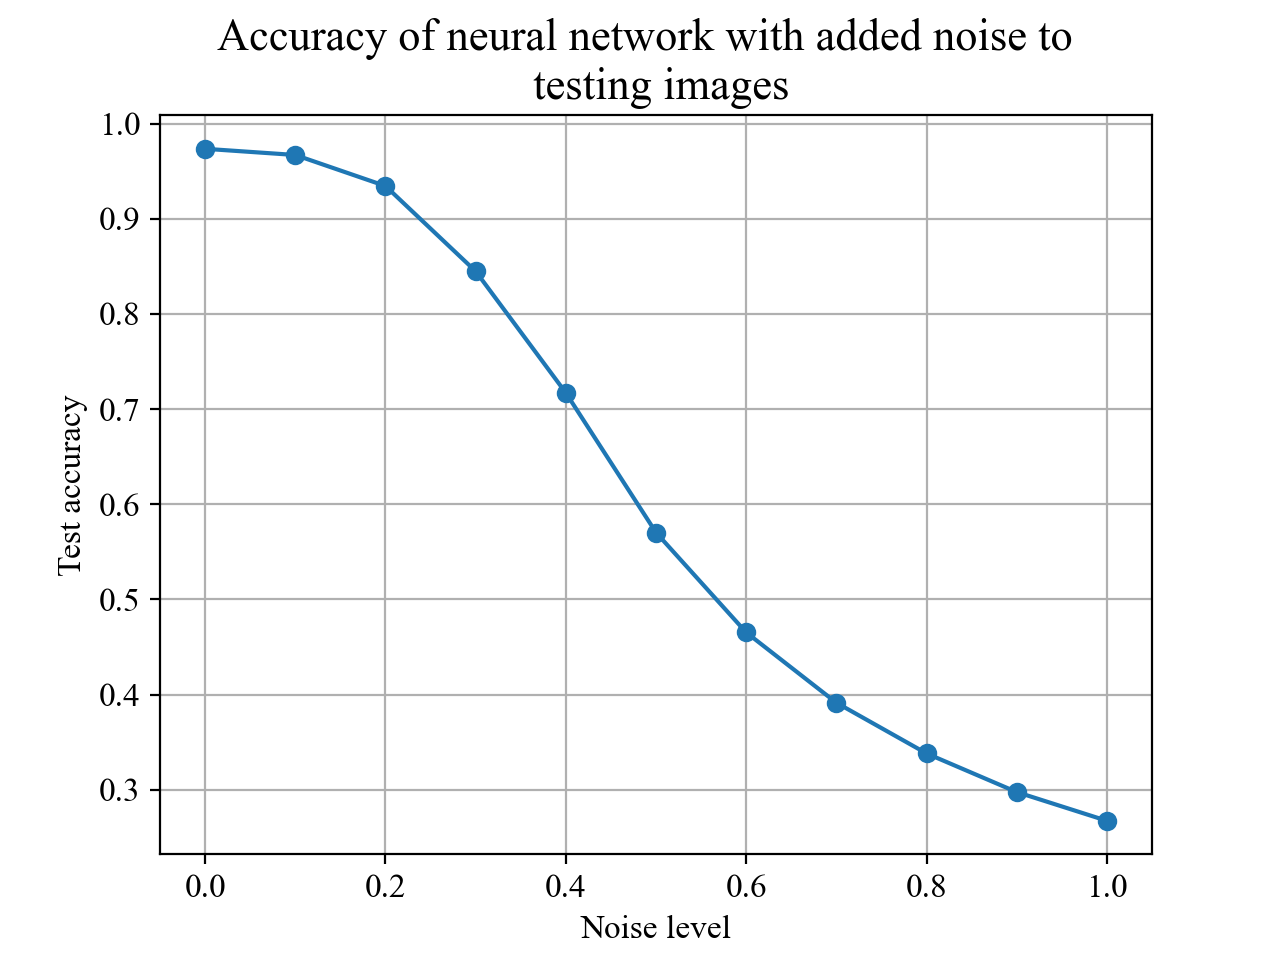

In [8]:
plt.figure(1)

plt.plot(y_noise0, test_accuracy_values, 'o-')
plt.ylabel('Test accuracy')
plt.xlabel('Noise level')
plt.title('Accuracy of neural network with added noise to  \n testing images')
plt.grid()

As the noise level on the testing images increases, the model becomes less accurate. For noise levels of above 0.3, the model's accuracy is less than 90%, and decreases as noise level increases. At a noise level of 1, the model is less than 45% accurate. As the noise level increases, the model finds it more difficult to match pixels from the testing images to the images with no noise previously tested trained on.

### 4. Adding noise to the testing and training images

In [9]:
test_accuracy_values_3 = [] #Array for plotting
y_noise = np.arange(0, 1, 0.2)

for i in y_noise:
    
    train_images_with_noise = add_noise(0.1)[0] #None-variable noise added to training images
    
    #Retraining the network
    model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10)
    ])
    
    model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), optimizer = tf.keras.optimizers.legacy.SGD(learning_rate = 1.0), metrics = ['accuracy'])
    history = model.fit(train_images_with_noise, train_labels, batch_size = 100, epochs = 10)
    
    test_accuracy_values_noise = []
    
    #Now test the network with different values of noise in the testing images given some noise in training
    # images
    for j in y_noise:
        
        test_images_with_noise = add_noise(j)[1]
        test_loss, test_accuracy = model.evaluate(test_images_with_noise, test_labels, verbose = 2)
        test_accuracy_values_noise.append(test_accuracy)
        
    test_accuracy_values_3.append(test_accuracy_values_noise)

Epoch 1/10
600/600 [==============================] - 1s 761us/step - loss: 0.9430 - accuracy: 0.6997
Epoch 2/10
600/600 [==============================] - 0s 780us/step - loss: 0.3348 - accuracy: 0.9020
Epoch 3/10
600/600 [==============================] - 0s 808us/step - loss: 0.2658 - accuracy: 0.9207
Epoch 4/10
600/600 [==============================] - 0s 792us/step - loss: 0.2390 - accuracy: 0.9288
Epoch 5/10
600/600 [==============================] - 0s 810us/step - loss: 0.2258 - accuracy: 0.9336
Epoch 6/10
600/600 [==============================] - 0s 776us/step - loss: 0.2091 - accuracy: 0.9381
Epoch 7/10
600/600 [==============================] - 0s 765us/step - loss: 0.1954 - accuracy: 0.9427
Epoch 8/10
600/600 [==============================] - 0s 750us/step - loss: 0.1884 - accuracy: 0.9446
Epoch 9/10
600/600 [==============================] - 0s 751us/step - loss: 0.1804 - accuracy: 0.9465
Epoch 10/10
600/600 [==============================] - 0s 749us/step - loss: 0.174

<IPython.core.display.Javascript object>


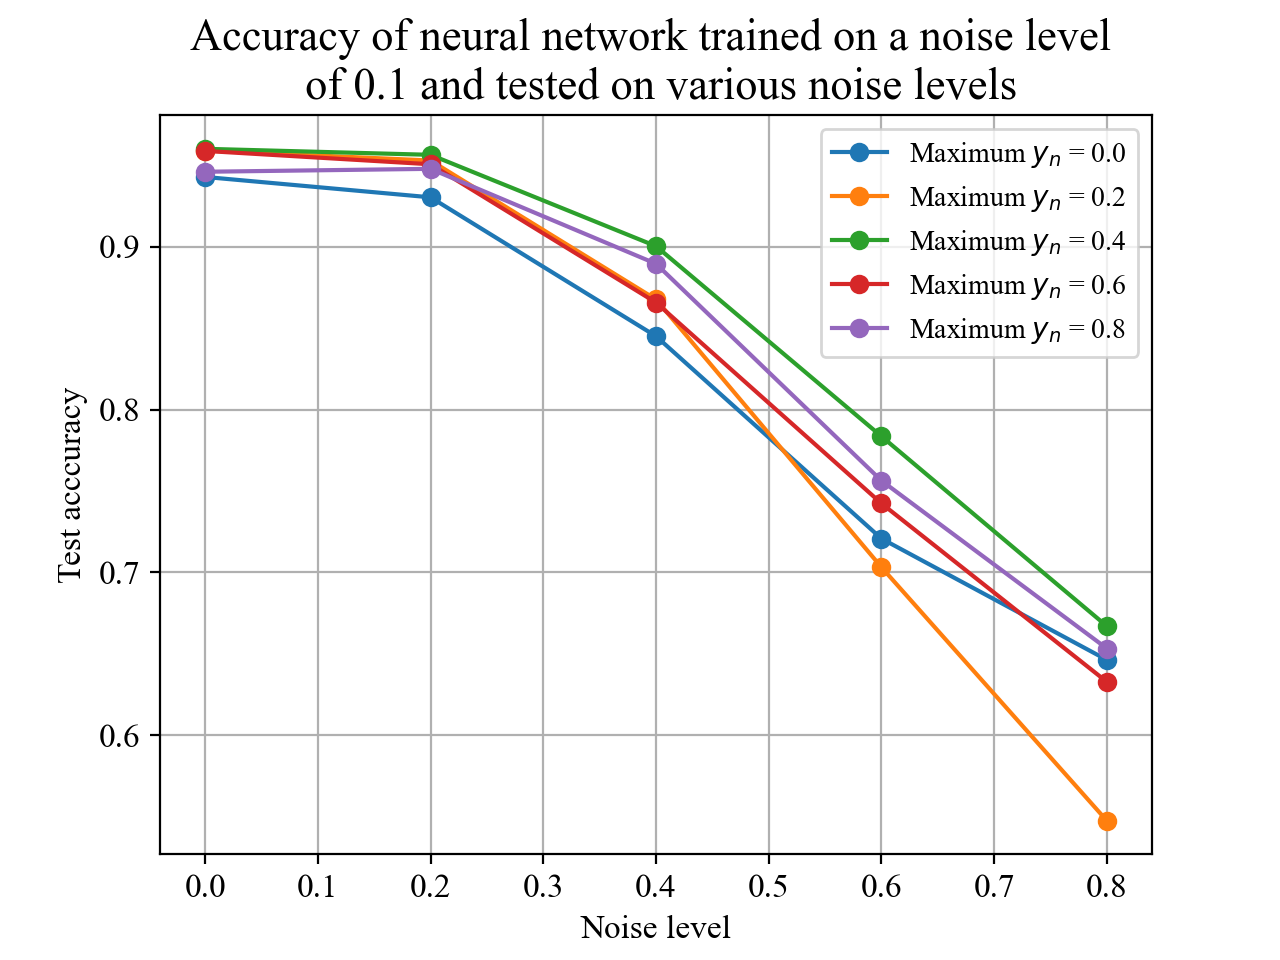

In [10]:
plt.figure(2)
for i, sublist in enumerate(test_accuracy_values_3):
    plt.plot(y_noise, sublist, 'o-', label = f'Maximum $y_n$ = {y_noise[i]:.1f}')

plt.xlabel('Noise level')
plt.ylabel('Test acccuracy')
plt.title('Accuracy of neural network trained on a noise level \n of 0.1 and tested on various noise levels')
plt.legend(loc='best')
plt.grid()

### 5. Best performance

From the plot above of testing the network on 5 different noise levels, having some noise on the testing images results in a better performance than testing with no noise. This is based on maximised performance being based on having high accuracy. The testing images with no noise actually don't perfomr the best, its the samples with some noise, specifically approximately 0.1 to 0.5, that have the highest accuracy.